# German Credit Card Dataset

### 1. Business Understanding

There are 5 C's of credit system, this helps to gauge the creditworthiness of potential borrowers. Creditworthiness helps the lender determine that you will default on your debt obligations, or how worthy are you to receive new credit.Creditworthiness is what they look at when they are to decide to give you new credits. The five C's of credit are character, capacity, capital, collateral and conditions.

1. Character: Credit history of the customer

2. Capacity: Assesses borrower's debt-to-income ratio

3. Capital: Assesses borrower's seriousness level

4. Collateral: It gives the lender the assurance that if the borrower defaults on the loan, the lender can get something back by repossessing the collateral.

5. Conditions: Conditions are the external variables that can affect credit and credit quality. This refers to national, international and local economy the industry and the bank itself.



### Features

Age (numeric)

Gender (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

### Objective
We are trying to find the creditworthiness of the customer on the German Credit DataSet.

In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 1. Loading the Dataset

In [2]:
#Load Dataset
DS_2 = pd.read_csv("./german_credit_data.csv")
print (DS_2.columns)
DS_2.head(10)

Index(['Unnamed: 0', 'Age', 'Gender', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


,Unnamed: 0,Age,Gender,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


#### 2.Descriptive Statistics

In [3]:
#Some data Stats
#DS_2.shape # Shape
#DS_2.info() # information
DS_2.describe() #Summary Stastics


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### 3. Missing Values identification and handling

In [4]:
#Looking out for missing values and handling them
DS_2.isnull().sum()

Unnamed: 0            0
Age                   0
Gender                0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
#finding out unique variables
print("Purpose : ",DS_2.Purpose.unique())
print("Gender : ",DS_2.Gender.unique())
print("Housing : ",DS_2.Housing.unique())
print("Saving accounts : ",DS_2['Saving accounts'].unique())
print("Checking account : ",DS_2['Checking account'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Gender :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' nan 'rich']


In [6]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Gender','Job','Housing','Saving accounts','Checking account','Purpose']
unused = ['Unnamed: 0']

DS_2 = DS_2.drop(columns = unused)
DS_2.shape

(1000, 9)

In [7]:
for cat in categorical:
    DS_2[cat] = DS_2[cat].fillna(DS_2[cat].mode().values[0])
DS_2.isnull().sum()

Age                 0
Gender              0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

#### 4. Visualize

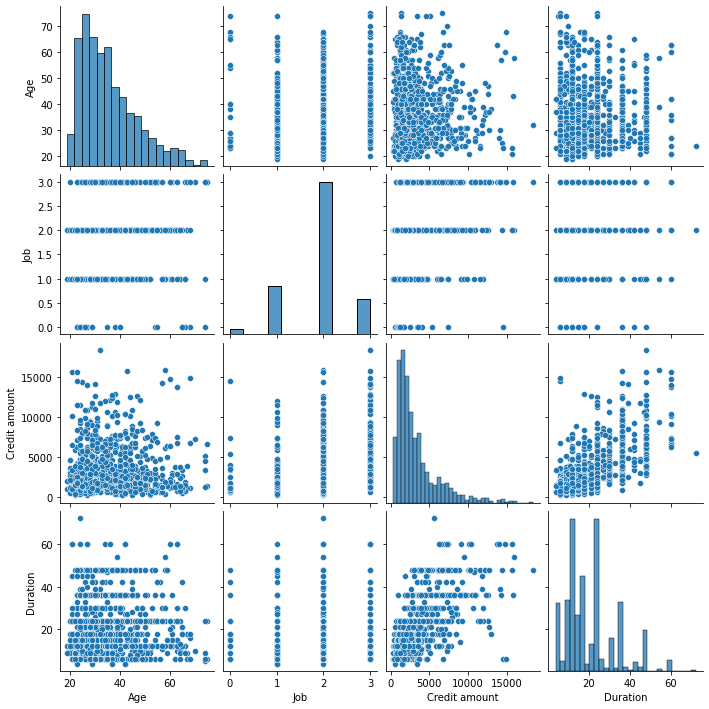

In [8]:
sns.pairplot(DS_2)

The above diagram shows pairplot of all the numerical features.

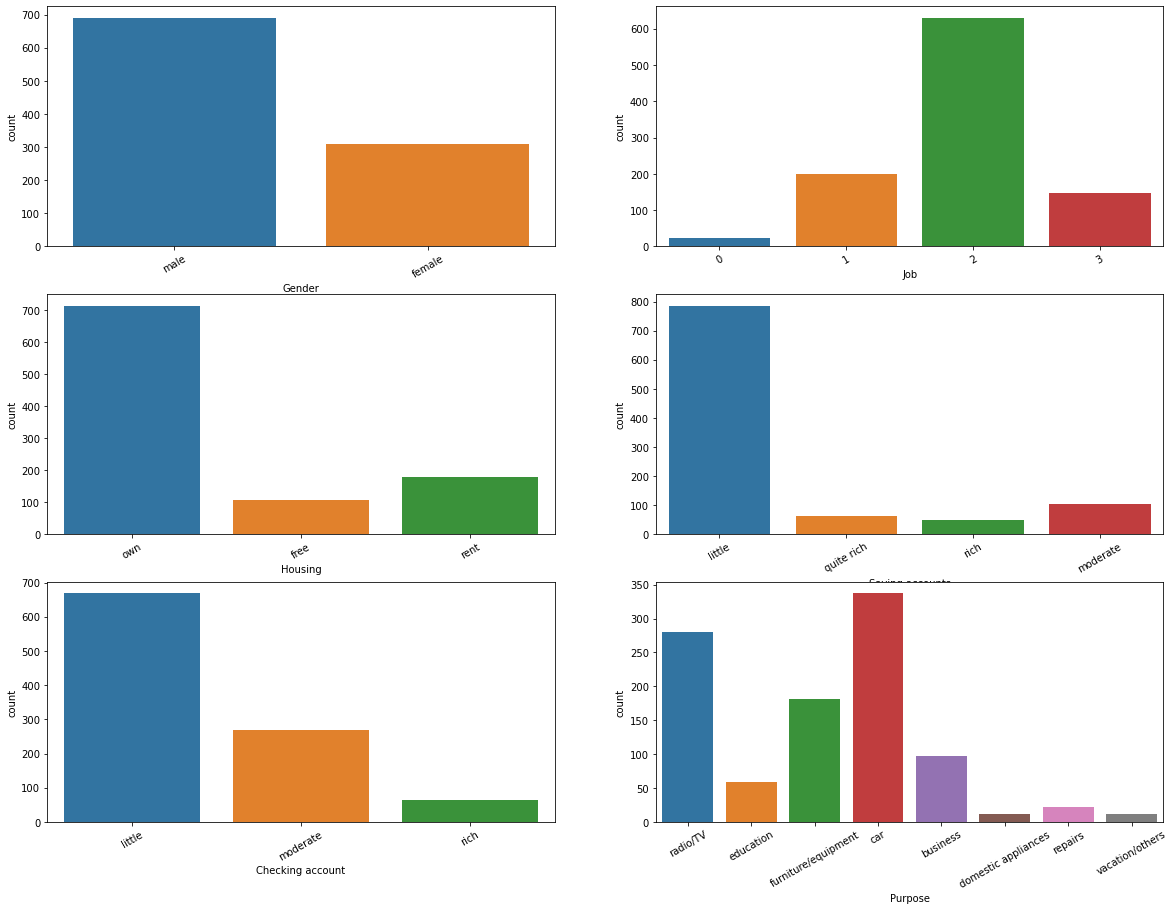

In [9]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = DS_2, x = cat)
    plt.xticks(rotation=30)
plt.show()

Conclusions from Plots above:

1. Men are more in number than women

2. Most of the customer are skilled on their job

3. Most of the customer have their own house

4. Most of the customers have little saving account

5. Most of the customer use credit for car

<AxesSubplot:>

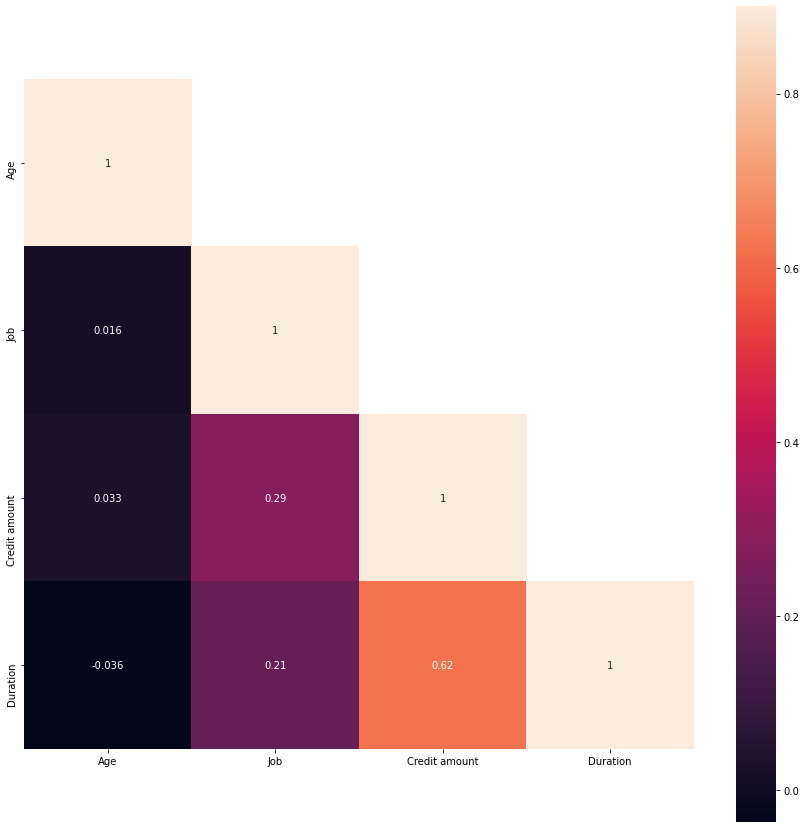

In [10]:
#create correlation
corr = DS_2.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

The heatmap shows best correlation between credit amount and duration.

In [11]:
DS_2_cluster = pd.DataFrame()
DS_2_cluster['Credit amount'] = DS_2['Credit amount']
DS_2_cluster['Age'] = DS_2['Age']
DS_2_cluster['Duration'] = DS_2['Duration']
DS_2_cluster['Job'] = DS_2['Job']
DS_2_cluster.head()

,Credit amount,Age,Duration,Job
0,1169,67,6,2
1,5951,22,48,2
2,2096,49,12,1
3,7882,45,42,2
4,4870,53,24,2


Plotting Box plots to find outliers - The box plot shows outliers in the numerical features

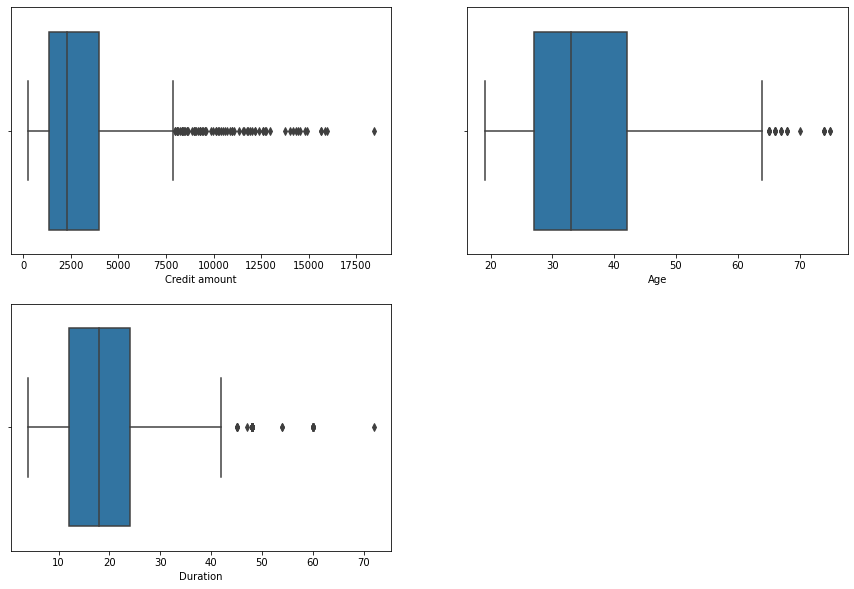

In [12]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = DS_2, x = num)
plt.show()

No handles with labels found to put in legend.


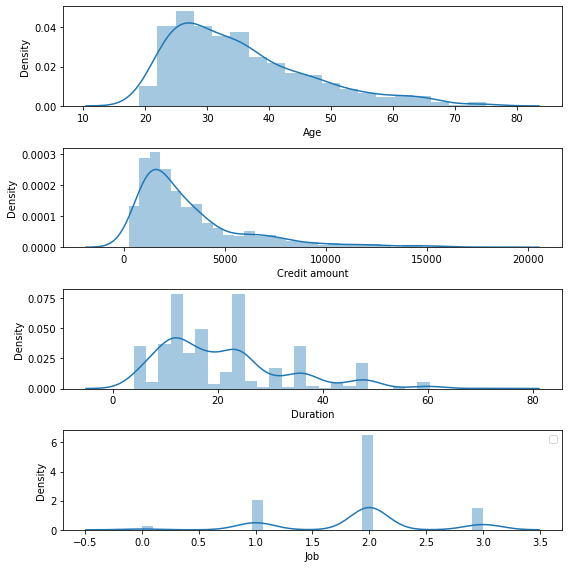

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(DS_2["Age"], ax=ax1)
sns.distplot(DS_2["Credit amount"], ax=ax2)
sns.distplot(DS_2["Duration"], ax=ax3)
sns.distplot(DS_2["Job"], ax=ax4)
plt.tight_layout()
plt.legend()

### Positive Skewness
means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

#Feature Engineering
## Log Transform
We can use logarithmic transformation to reduce the outliers and distribution skewness

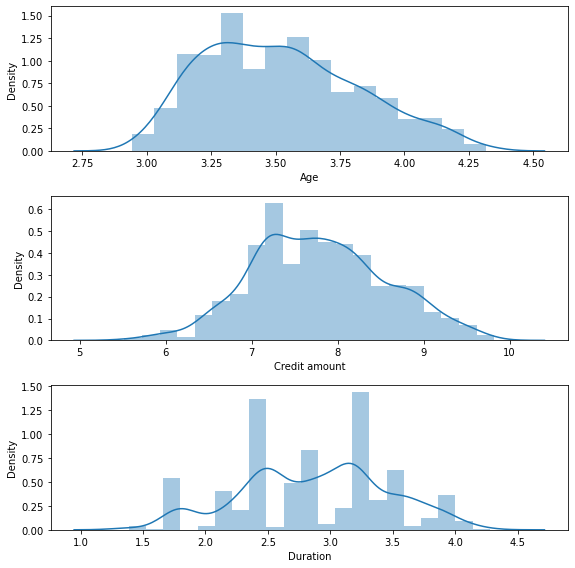

In [14]:
DS_2_cluster_log = np.log(DS_2_cluster[['Age', 'Credit amount','Duration']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(DS_2_cluster_log["Age"], ax=ax1)
sns.distplot(DS_2_cluster_log["Credit amount"], ax=ax2)
sns.distplot(DS_2_cluster_log["Duration"], ax=ax3)
plt.tight_layout()


This has caused the skewness to be removed.

In [15]:
#Fit and transform
DS_2_cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(DS_2_cluster_log)

#### 6. Models

1- K-means
 
2- Mini Batch K Means

3- Mean Shift

K-means
First we use the Elbow Method to determine the optimal k value for the k-means

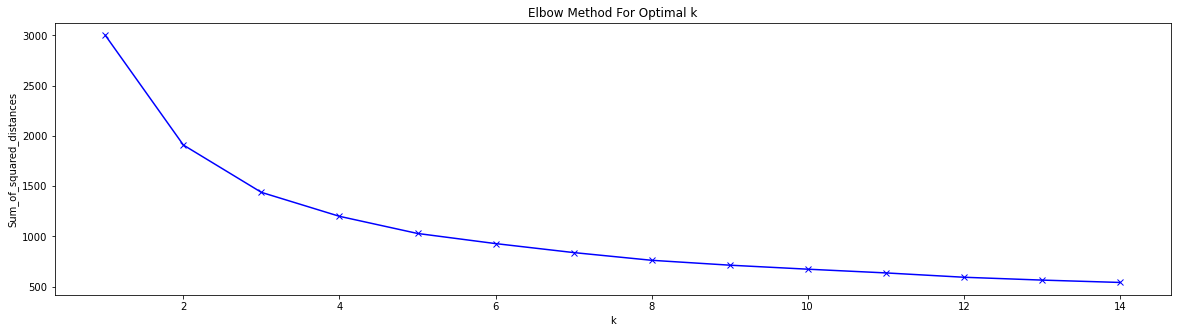

In [17]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


From the figure above we can see that the most optimal values are 3. So we choose 3 as the k values of the k-means model.

K-Means


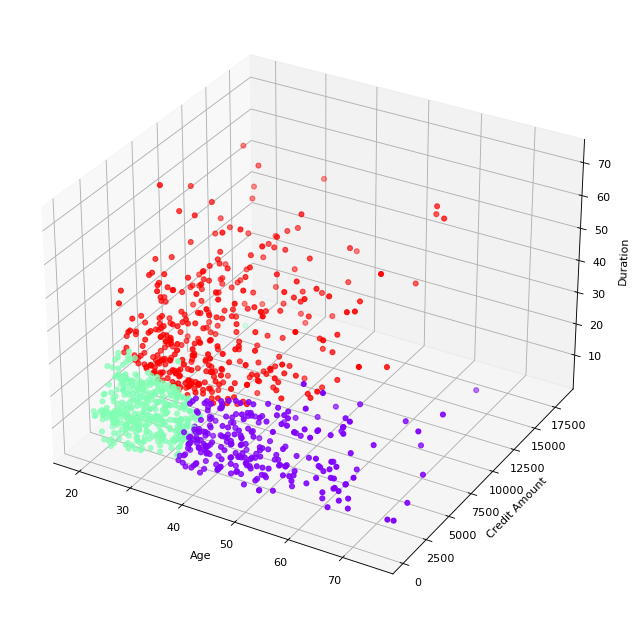

In [18]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster['Age'],DS_2_cluster['Credit amount'],DS_2_cluster['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

In [19]:
DS2_clustered_kmeans = DS_2_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Credit amount,Age,Duration,Job
Cluster,,,,
0,1974.5,48.7,13.8,1.8
1,1754.4,27.8,14.5,1.8
2,5722.0,34.2,32.4,2.1


The table shows centroids of each clusters that could determine the clusters rule.
These are:

Cluster 0: Lower credit amount, young, short duration customers
 

Cluster 1: Higher credit amount, middle-aged, long duration customers

Cluster 2: Lower Credit amount,old,short duration customers
    

 Mini Batch K-Means


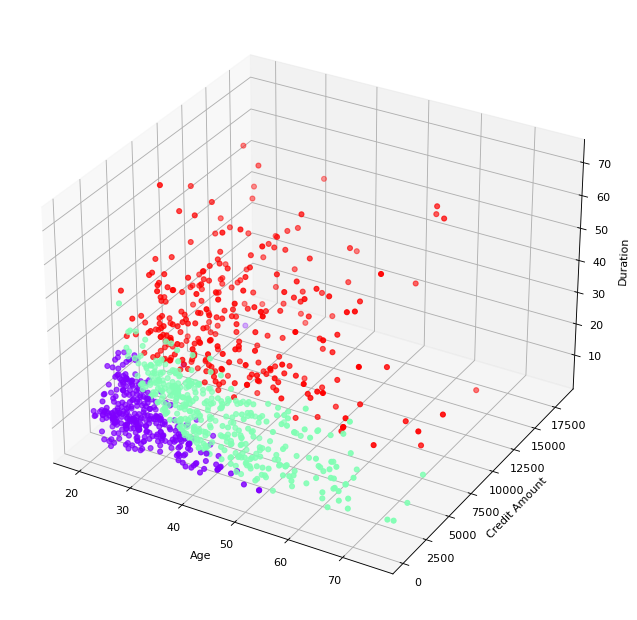

In [20]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 

batch_size = 20
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = 0) 
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers) 
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster['Age'],DS_2_cluster['Credit amount'],DS_2_cluster['Duration'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print(" Mini Batch K-Means")

In [21]:
DS2_clustered_kmeans = DS_2_cluster.assign(Cluster=mbk_means_labels)
grouped_kmeans_minibatch = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans_minibatch 
print(grouped_kmeans_minibatch)

         Credit amount   Age  Duration  Job
Cluster                                    
0               1652.1  27.8      12.3  1.7
1               2151.9  40.9      17.8  1.8
2               6526.3  36.7      34.3  2.2


BW is 1.1057033807407821
Mean shift K-Means
number of estimated clusters : 4


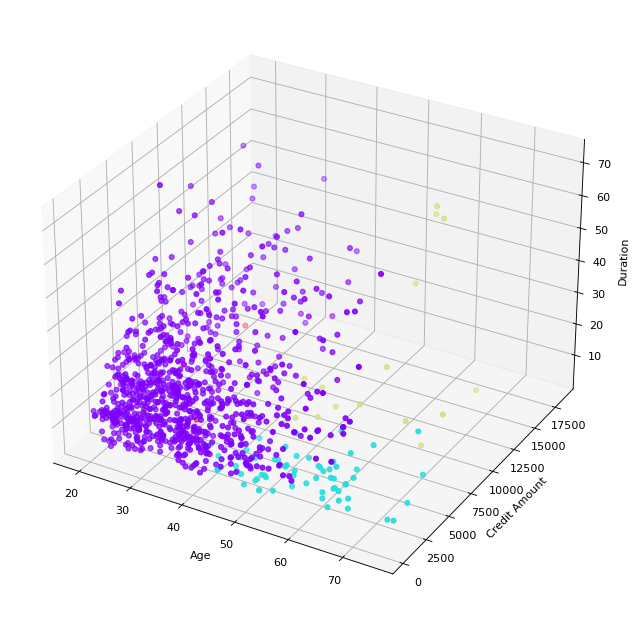

In [34]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled, quantile=0.1)
print("BW is",bandwidth)
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled)
labels = analyzer.labels_


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster['Age'],DS_2_cluster['Credit amount'],DS_2_cluster['Duration'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Mean shift K-Means")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)


In [35]:
DS2_clustered_ms = DS_2_cluster.assign(Cluster=labels)
grouped_ms = DS2_clustered_ms.groupby(['Cluster']).mean().round(1)
grouped_ms

,Credit amount,Age,Duration,Job
Cluster,,,,
0,3232.6,33.7,21.7,1.9
1,1914.6,56.8,9.5,1.7
2,9489.3,58.6,24.5,2.7
3,8343.2,25.6,10.8,1.4


### 6.2. Hierarchical Agglomerative Clustering¶


On this model, to determine the n_clusters we can use dendogram.

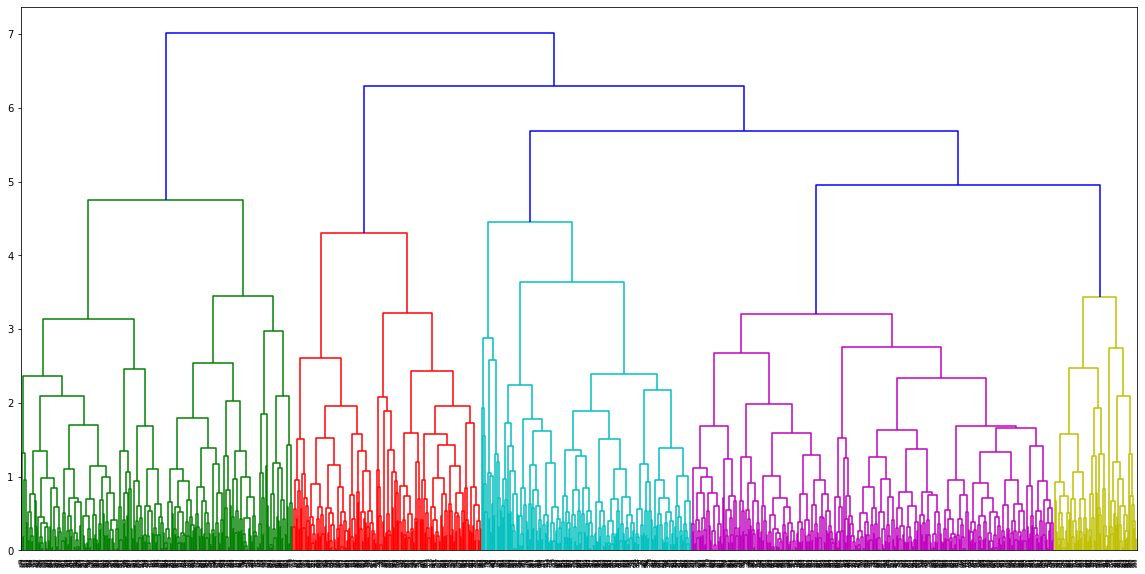

In [40]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='complete'))

Hierarchical Agglomerative Clustering


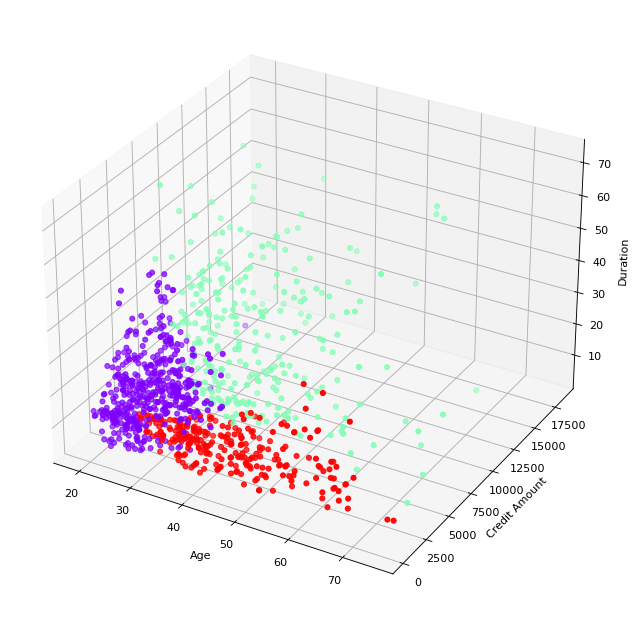

In [38]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster['Age'],DS_2_cluster['Credit amount'],DS_2_cluster['Duration'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [39]:
DS2_clustered_hac = DS_2_cluster.assign(Cluster=hac_labels)
grouped_hac = DS2_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Credit amount,Age,Duration,Job
Cluster,,,,
0,2278.0,27.6,19.6,1.9
1,6477.0,40.4,32.0,2.2
2,1644.1,44.0,11.7,1.7


The table above shows the centroid of each clusters that could determine the clusters rule. These are:

Cluster 0 : Higher credit amount, old, long duration customers

Cluster 1 : Lower credit amount, young, long duration customers

Cluster 2 : Lower credit amount, old, short duration customers

Cluster 3 : Lower credit amount, young, short duration customers

###  Result Analysis

From these models, we can choose the most well segmented model, that is k-means. We use the clusters from the that model to analyze the dataset.'

Looking back from the centroid of the clusters, let's see the "returning power" of each of the centroid by dividing the Credit amount with the duration. The higher the "returning power".

In [21]:
grouped_kmeans

,Credit amount,Age,Duration,Job
Cluster,,,,
0,1736.3,27.7,14.3,1.8
1,5665.4,34.0,32.2,2.1
2,1970.3,48.5,13.9,1.8


In [22]:
df_clustered = DS_2.assign(Cluster=kmeans_labels)
df_clustered.head()

,Age,Gender,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,little,little,1169,6,radio/TV,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,2
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1


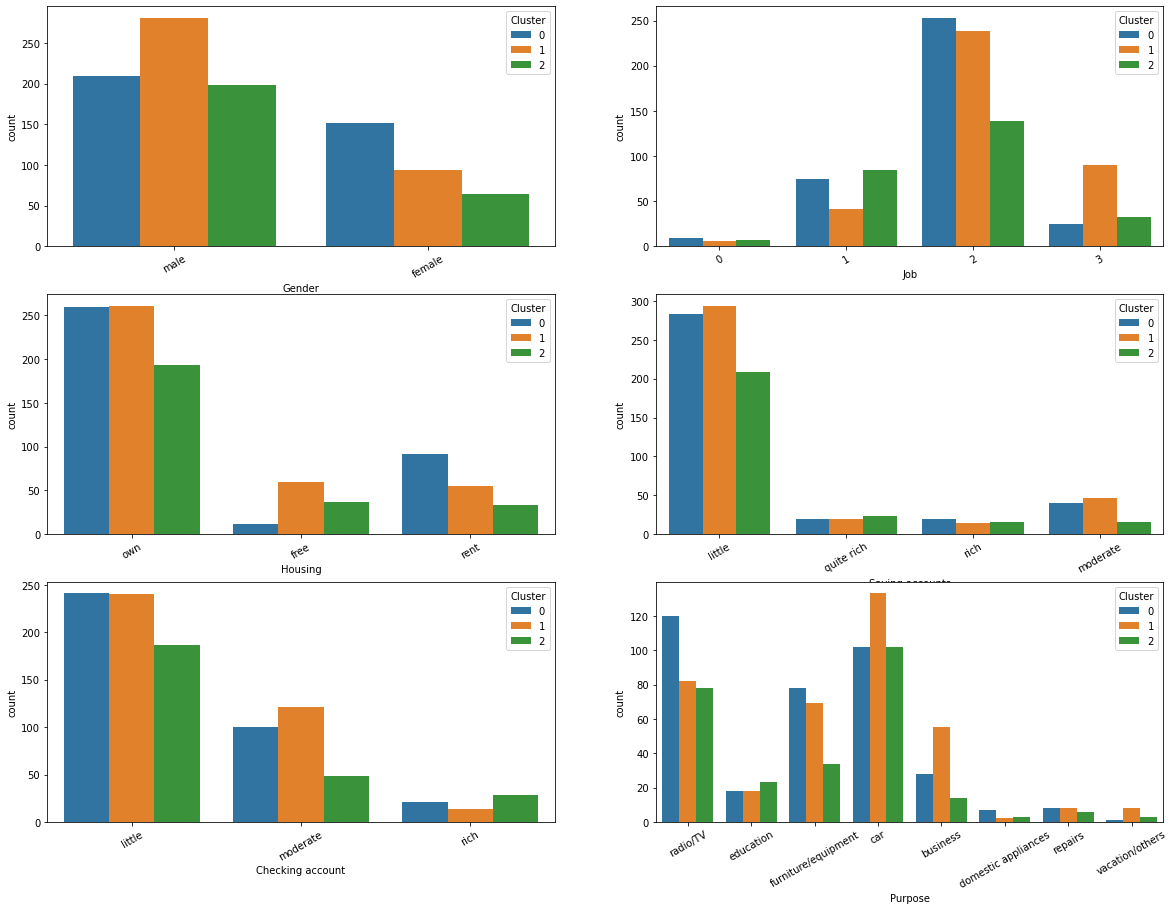

In [23]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df_clustered, hue=df_clustered['Cluster'], x = cat)
    plt.xticks(rotation=30)
plt.show()

Above are figures of the clusters distribution on each categorical feature.


#### Summaries

After comparing three kind of clustering models, we decide to use k-means as the model
The data divided into three clusters
The three clusters can be used to determine the creditworthiness of the German Credit potential borrowers
Each of the cluster have their own characteristics